In [9]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [10]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [11]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2019-01-14,-0.006779
2019-01-15,0.009391
2019-01-16,-0.006980
2019-01-17,-0.000144
2019-01-18,0.008569


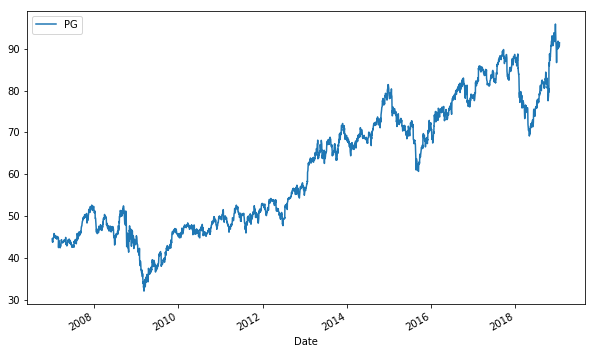

In [12]:
data.plot(figsize=(10, 6));

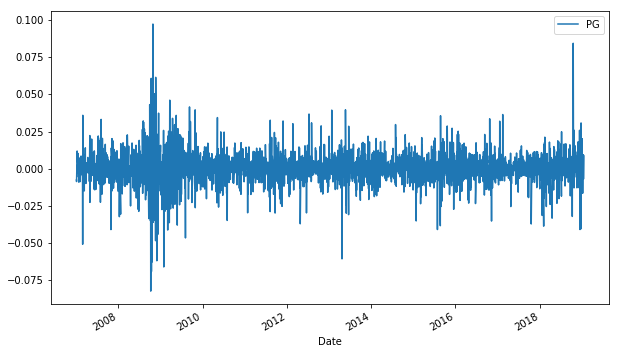

In [13]:
log_returns.plot(figsize = (10, 6))

In [14]:
u = log_returns.mean()
u

PG    0.000237
dtype: float64

In [15]:
var = log_returns.var()
var

PG    0.000121
dtype: float64

In [16]:
drift = u - (0.5 * var)
drift

PG    0.000177
dtype: float64

In [17]:
stdev = log_returns.std()
stdev

PG    0.010992
dtype: float64

In [18]:
type(drift)

pandas.core.series.Series

In [19]:
type(stdev)

pandas.core.series.Series

In [20]:
np.array(drift)

array([0.00017653])

In [21]:
drift.values

array([0.00017653])

In [22]:
stdev.values

array([0.01099233])

In [23]:
norm.ppf(0.95)

1.6448536269514722

In [25]:
x = np.random.rand(10, 2)
x

array([[0.52120282, 0.52448976],
       [0.92902971, 0.20269192],
       [0.47463513, 0.91641245],
       [0.48561103, 0.752037  ],
       [0.18794391, 0.2619804 ],
       [0.7781873 , 0.77913393],
       [0.68628835, 0.75614978],
       [0.97313738, 0.0105871 ],
       [0.99017055, 0.77881867],
       [0.92928835, 0.74734482]])

In [26]:
norm.ppf(x)

array([[ 0.05317263,  0.06142532],
       [ 1.4686027 , -0.83204446],
       [-0.06362319,  1.38133786],
       [-0.03607562,  0.68091384],
       [-0.8854985 , -0.63725185],
       [ 0.76608557,  0.76927152],
       [ 0.48535676,  0.69397092],
       [ 1.92904531, -2.3048639 ],
       [ 2.33279503,  0.7682096 ],
       [ 1.47051142,  0.66615761]])

In [27]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.44790677,  1.2933268 ],
       [ 0.17615666,  0.56002993],
       [-1.30087855,  1.81475972],
       [ 0.21187961, -0.39688571],
       [-1.715542  , -1.11792155],
       [ 0.45958438, -1.26200293],
       [-1.57794284,  0.28079042],
       [ 1.01563372,  0.24033828],
       [ 0.21796422, -0.69814209],
       [-0.19309088, -0.12506371]])

In [28]:
t_intervals = 1000
iterations = 10

In [29]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [30]:
daily_returns

array([[0.99446044, 1.01019266, 1.02259366, ..., 1.00808557, 0.99712084,
        0.99619662],
       [0.99932531, 0.99229569, 1.00993887, ..., 1.00017425, 1.01305968,
        1.00332904],
       [0.9947014 , 1.0028169 , 0.9906958 , ..., 1.00026001, 0.97862673,
        1.00114634],
       ...,
       [1.00185085, 1.0009163 , 0.99256262, ..., 1.01635585, 0.9805187 ,
        0.98957031],
       [0.98236336, 0.9943155 , 1.00160679, ..., 0.9988438 , 1.00737527,
        1.0085083 ],
       [1.00695183, 1.01431534, 0.998699  , ..., 0.98705029, 0.9990835 ,
        1.01362398]])

In [31]:
S0 = data.iloc[-1]
S0

PG    91.419998
Name: 2019-01-18 00:00:00, dtype: float64

In [32]:
price_list = np.zeros_like(daily_returns)

In [33]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
price_list[0] = S0
price_list

array([[91.41999817, 91.41999817, 91.41999817, ..., 91.41999817,
        91.41999817, 91.41999817],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [37]:
price_list

array([[ 91.41999817,  91.41999817,  91.41999817, ...,  91.41999817,
         91.41999817,  91.41999817],
       [ 91.35831771,  90.71566973,  92.32860994, ...,  91.43592802,
         92.61391378,  91.72433874],
       [ 90.87424643,  90.97120687,  91.46956599, ...,  91.45970206,
         90.63445164,  91.82948614],
       ...,
       [120.80680678,  64.29276187, 121.53969543, ..., 142.5516266 ,
         68.67996938,  61.89463136],
       [118.67618113,  63.92728954, 121.73498439, ..., 142.38680792,
         69.18650296,  62.42124976],
       [119.50119804,  64.84243035, 121.57660697, ..., 140.54294023,
         69.12309339,  63.27167531]])

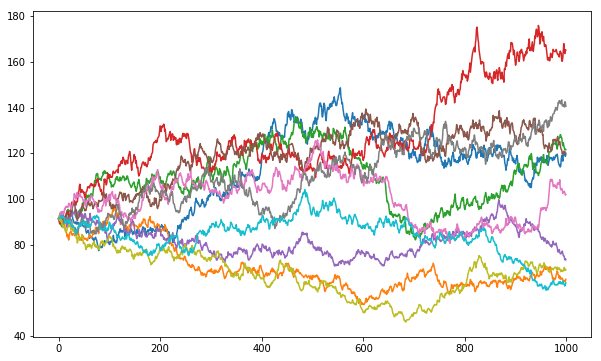

In [38]:
plt.figure(figsize=(10,6))
plt.plot(price_list);